In [1]:
import matplotlib.pyplot as plt
from tqdm import * #progress bar
from sccm import CryptoCurrencyModel, PaperModel
from sccm.agents import *
from sccm._parameters import Parameters
from sccm.market import Order
import numpy as np

In [2]:
model = PaperModel()

In [3]:
#%%prun -s cumulative
for i in tqdm(range(365*5)): #todo use batch runner from mesa for MC sim
    model.step()

100%|██████████████████████████████████████████████████████████████████████████████| 1825/1825 [00:18<00:00, 96.13it/s]


In [4]:
gini = model.datacollector.get_model_vars_dataframe()
def plotdata(l, tit, x='time (day)', y='', legend='none', lg=False):
    gini[l].plot(logy=lg)
    plt.title(tit)
    plt.xlabel(x)
    plt.ylabel(y)
    if legend != 'none':
        plt.legend(legend)
    plt.show()

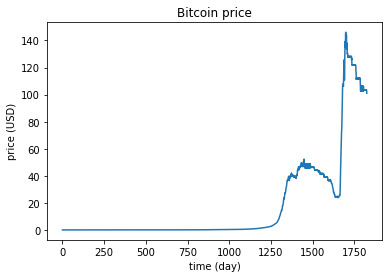

In [5]:
plotdata('price', 'Bitcoin price', y='price (USD)')

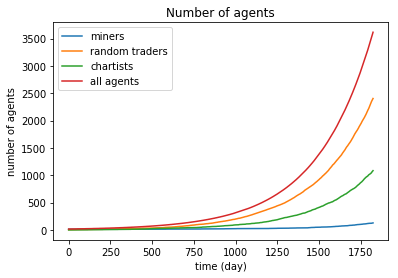

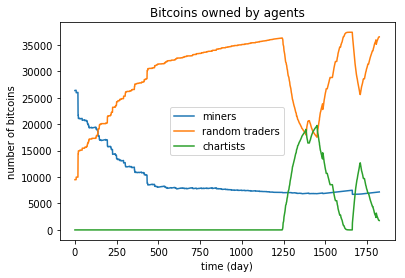

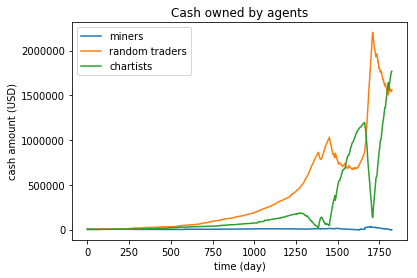

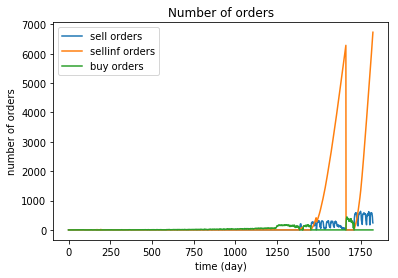

In [6]:
legend1 = ['miners', 'random traders', 'chartists', 'all agents']
plotdata(['n_miner', 'n_trader', 'n_chartist', 'n_agents'], 'Number of agents', y='number of agents', legend=legend1)
plotdata(['btc_miner', 'btc_trader', 'btc_chartist'], 'Bitcoins owned by agents', y='number of bitcoins', legend=legend1[:3])
plotdata(['cash_miner', 'cash_trader', 'cash_chartist'], 'Cash owned by agents', y='cash amount (USD)', legend=legend1[:3])
legend2 = ['sell orders', 'sellinf orders', 'buy orders']
plotdata(['n_orders_sell', 'n_orders_sellinf', 'n_orders_buy'], 'Number of orders', y='number of orders', legend=legend2)

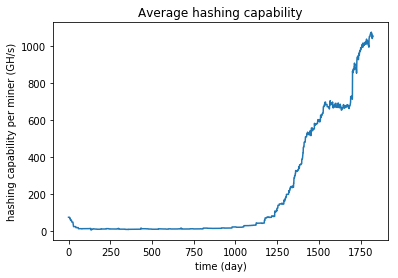

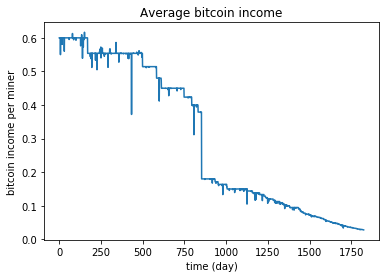

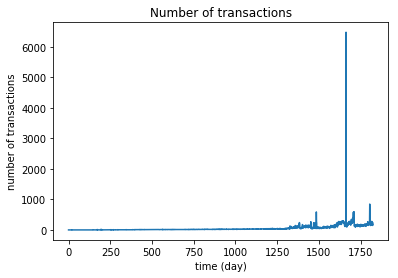

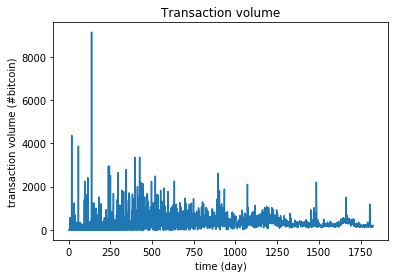

In [7]:
#for p in [, 'hashing_cap_avg','btc_mined_avg', 'n_transactions', 'transaction_volume']:#,'electricity_cost', 'hardware_bought']:
#    plotdata([p])
plotdata('energy_cons_avg', 'Average hashing capability', y='hashing capability per miner (GH/s)')
plotdata('btc_mined_avg', 'Average bitcoin income', y='bitcoin income per miner')
plotdata('n_transactions', 'Number of transactions', y='number of transactions')
plotdata('transaction_volume', 'Transaction volume', y='transaction volume (#bitcoin)')

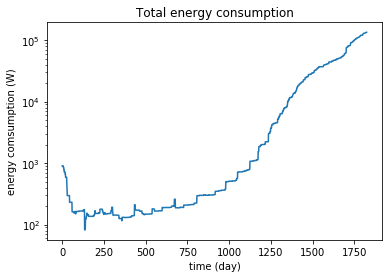

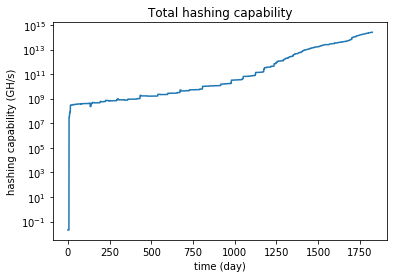

In [8]:
#for p in ['energy_cons_total', 'hashing_cap_total']:
plotdata('energy_cons_total', 'Total energy consumption', y='energy comsumption (W)', lg=True)
plotdata('hashing_cap_total', 'Total hashing capability', y='hashing capability (GH/s)', lg=True)

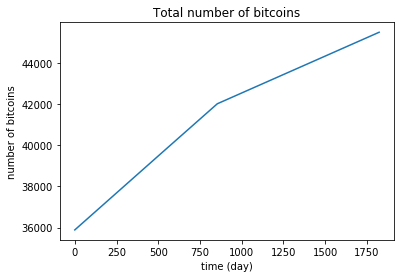

In [9]:
gini[['btc_miner', 'btc_trader', 'btc_chartist']].sum(axis=1).plot()
plt.title('Total number of bitcoins')
plt.xlabel('time (day)')
plt.ylabel('number of bitcoins')
plt.show()

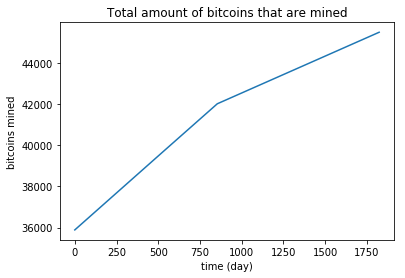

In [10]:
plotdata('total_amount_mined', 'Total amount of bitcoins that are mined', y='bitcoins mined')

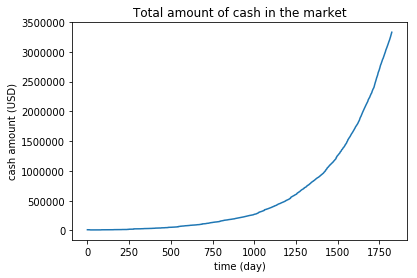

In [11]:
gini[['cash_miner', 'cash_trader', 'cash_chartist']].sum(axis=1).plot()
plt.title('Total amount of cash in the market')
plt.xlabel('time (day)')
plt.ylabel('cash amount (USD)')
plt.show()

In [12]:
def getsum6(p):
    dat = list(gini[p])
    n = len(dat)
    m = int(np.floor(n/6))
    k = 6*m
    return np.array(dat[:k]).reshape(m, 6).sum(axis=1)

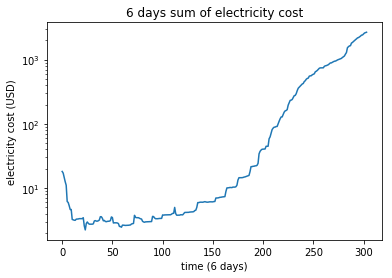

In [13]:
plt.semilogy(getsum6('electricity_cost'))
plt.title('6 days sum of electricity cost')
plt.xlabel('time (6 days)')
plt.ylabel('electricity cost (USD)')
plt.show()

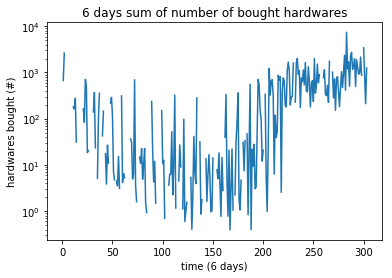

In [14]:
plt.semilogy(getsum6('hardware_bought'))
plt.title('6 days sum of number of bought hardwares')
plt.xlabel('time (6 days)')
plt.ylabel('hardwares bought (#)')
plt.show()